In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re

In [ ]:
df = ## NMT Pefofrmance Data

In [ ]:
def getXYPoints(DA="Baseline",lang="tur"):

  xs = sizes_num
  ys = [float(x) for x in df[df['DA']==DA][df[df['DA']==DA]['lang']==lang][sizes].values[0]]

  #plt.plot(xs, ys)

  return np.array(xs), np.array(ys)


In [ ]:
def boundedCurve(x1,y1,x2,y2):
  upper_y_bound = min(max(y1), max(y2))
  lower_y_bound = max(min(y1), min(y2))

  ## curve 1
  x1_new_low = np.interp(lower_y_bound, y1, x1,  left=None, right=None, period=None)
  x1_new_high = np.interp(upper_y_bound, y1, x1,  left=None, right=None, period=None)
  x1_new = [x1_new_low] + [x for x in x1 if x > x1_new_low and x < x1_new_high] + [x1_new_high]
  y1_new = [lower_y_bound] + [y for y in y1 if y > lower_y_bound and y < upper_y_bound] + [upper_y_bound]


  ## curve 2
  x2_new_low = np.interp(lower_y_bound, y2, x2,  left=None, right=None, period=None)
  x2_new_high = np.interp(upper_y_bound, y2, x2,  left=None, right=None, period=None)
  x2_new = [x2_new_low] + [x for x in x1 if x > x2_new_low and x < x2_new_high] + [x2_new_high]
  y2_new = [lower_y_bound] + [y for y in y2 if y > lower_y_bound and y < upper_y_bound] + [upper_y_bound]

  return x1_new, y1_new, x2_new, y2_new, lower_y_bound, upper_y_bound

In [ ]:
def f(x, x1,y1):

  if x < min(x1):
    return y1[0]
  if x > max(x1):
    return y1[-1]
  else:
    return np.interp(x,x1,y1)

In [ ]:
from scipy.integrate import quad

In [ ]:
def getArea(x1,y1,x2,y2):
  x1,y1,x2,y2, lower_y_bound, upper_y_bound = boundedCurve(x1,y1,x2,y2)

  area2 = quad(lambda x: f(x,x2,y2), min(sizes_num), max(sizes_num))[0]
  area1 = quad(lambda x: f(x,x1,y1), min(sizes_num), max(sizes_num))[0]

  if lang == "deu":
      plt.plot(x2,y2)
      plt.plot(x1,y1,color="black")
    #plt.axhline(lower_y_bound)
    #plt.axhline(upper_y_bound)

  return area2 - area1, upper_y_bound - lower_y_bound

In [ ]:
def getAAA(x1,y1,x2,y2):
  area, height = getArea(x1,y1,x2,y2)
  return area / height

In [ ]:
def getAAAForDALang(DA, lang):
  x1, y1 = getXYPoints(DA="Baseline",lang=lang)
  x2, y2 = getXYPoints(DA=DA,lang=lang)

  return getAAA(x1,y1,x2,y2)

In [ ]:
data=df[['lang','DA']]

In [ ]:
data['xs'] = data.apply(lambda x: getXYPoints(DA=x['DA'],lang=x['lang'])[0],axis=1)
data['ys'] = data.apply(lambda x: getXYPoints(DA=x['DA'],lang=x['lang'])[1],axis=1)

In [ ]:
data

,lang,DA,xs,ys
0,ita,Baseline,"[50000, 100000, 200000, 500000, 1000000]","[11.1, 23.9, 27.8, 29.6, 30.4]"
1,ita,BT,"[50000, 100000, 200000, 500000, 1000000]","[19.9, 20.9, 28.4, 28.4, 29.0]"
2,ita,SO,"[50000, 100000, 200000, 500000, 1000000]","[12.1, 24.8, 27.5, 27.6, 28.1]"
3,ita,FM,"[50000, 100000, 200000, 500000, 1000000]","[10.9, 18.7, 24.0, 23.9, 100.0]"
4,ita,SC,"[50000, 100000, 200000, 500000, 1000000]","[13.6, 24.8, 28.8, 30.7, 31.0]"
7,tur,Baseline,"[50000, 100000, 200000, 500000, 1000000]","[5.5, 9.8, 14.4, 15.7, 16.5]"
8,tur,BT,"[50000, 100000, 200000, 500000, 1000000]","[7.1, 13.2, 15.6, 16.4, 17.0]"
9,tur,SO,"[50000, 100000, 200000, 500000, 1000000]","[6.1, 10.4, 13.0, 14.1, 14.2]"
10,tur,FM,"[50000, 100000, 200000, 500000, 1000000]","[1.8, 4.0, 6.8, 100.0, 100.0]"
11,tur,SC,"[50000, 100000, 200000, 500000, 1000000]","[5.6, 9.8, 14.5, 16.7, 17.6]"


In [ ]:
flat_list = [item for sublist in data['ys'].values for item in sublist]
flat_list_x = [item for sublist in data['xs'].values for item in sublist]

flat_aug = [[x]*5 for x in data['DA'].values]
flat_aug = [item for sublist in flat_aug for item in sublist]

flat_lang = [[x]*5 for x in data['lang'].values]
flat_lang = [item for sublist in flat_lang for item in sublist]

In [ ]:
flat_list_x_str = [item for sublist in data['sizestr'].values for item in sublist]

In [ ]:
data['sizestr'] = data['xs'].apply(lambda c: [re.sub("[^0-9.]","",str(x)) for x in c])

In [ ]:
dataagain = pd.DataFrame({"y":flat_list,'x':flat_list_x,'DA':flat_aug,'lang':flat_lang,
                          'x_str':flat_list_x_str})

In [ ]:
dataagain = dataagain[dataagain['DA']!="FM"]

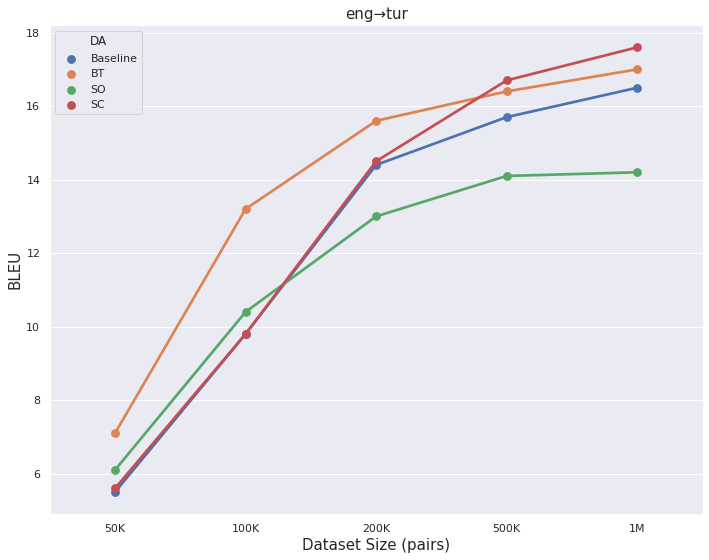

In [ ]:
sns.set_style({'font.serif':'Times New Roman'})

sns.set(rc={'figure.figsize':(11.7,9)})
ax=sns.pointplot(x='x_str',y='y',data=dataagain[dataagain['lang']=='tur'],hue='DA',palette='deep')


ax.set_xticklabels(sizes)
sns.set(font="Times New Roman")

ax.axes.set_title("eng→tur",fontsize=15)
ax.set_xlabel("Dataset Size (pairs)",fontsize=15)
ax.set_ylabel("BLEU",fontsize=15)
plt.show()

In [ ]:
import matplotlib as m

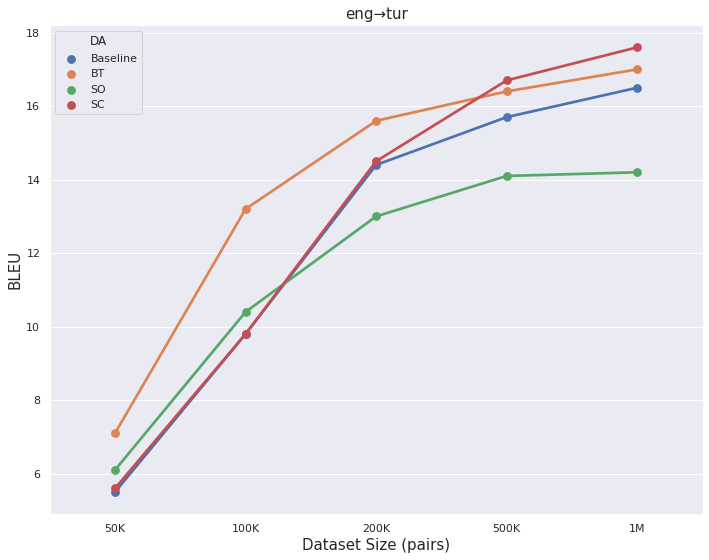

In [ ]:
sns.set(font="Times New Roman")
sns.set_style({'fontname':'Times New Roman','family':'serif'})
sns.set_theme(font='serif')




sns.set(rc={'figure.figsize':(11.7,9)})
ax=sns.pointplot(x='x_str',y='y',data=dataagain[dataagain['lang']=='tur'],hue='DA',palette='deep',)

ax.set_xticklabels(sizes,fontdict={'size':11,'fontname':'Times New Roman','family':'serif'})

ax.axes.set_title("eng→tur",fontdict={'size':15,'fontname':'Times New Roman','family':'serif'})
ax.set_xlabel("Dataset Size (pairs)",fontdict={'size':15,'fontname':'Times New Roman','family':'serif'})
ax.set_ylabel("BLEU",fontdict={'size':15,'fontname':'Times New Roman','family':'serif'})
plt.show()

In [ ]:
plt.rcParams.keys()

In [ ]:
ax.figure.savefig("eng-tur.jpg",dpi=600)


In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = ['Times New Roman'] + plt.rcParams['font.serif']

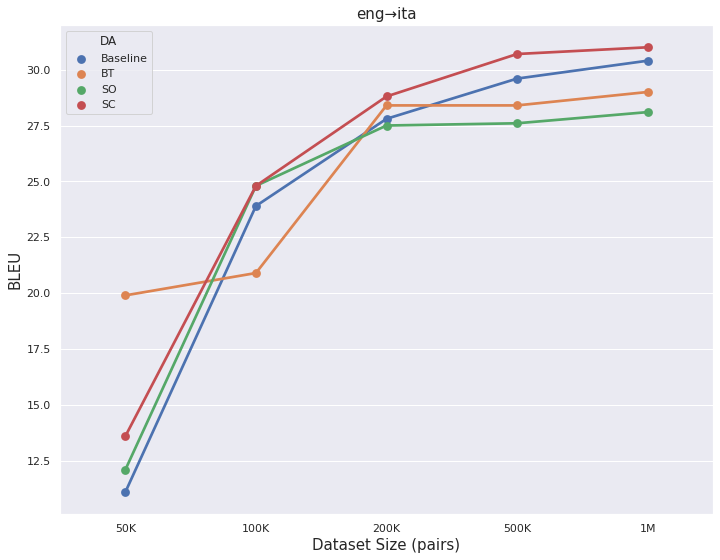

In [ ]:

sns.set(rc={'figure.figsize':(11.7,9)},)

ax=sns.pointplot(x='x_str',y='y',data=dataagain[dataagain['lang']=='ita'],hue='DA',palette='deep')


ax.set_xticklabels(sizes)

ax.axes.set_title("eng→ita",fontsize=15)
ax.set_xlabel("X Label",fontsize=15)
ax.set_ylabel("Y Label",fontsize=15)
ax.set(xlabel='Dataset Size (pairs)', ylabel='BLEU')
plt.show()

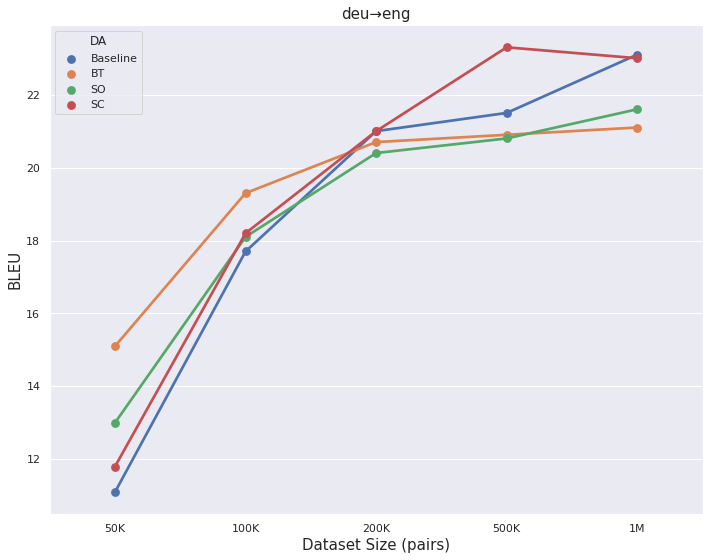

In [ ]:

sns.set(rc={'figure.figsize':(11.7,9)})
ax=sns.pointplot(x='x_str',y='y',data=dataagain[dataagain['lang']=='deu'],hue='DA',palette='deep')


ax.set_xticklabels(sizes)

ax.set(title='deu→eng')
ax.axes.set_title("deu→eng",fontsize=15)
ax.set_xlabel("X Label",fontsize=15)
ax.set_ylabel("Y Label",fontsize=15)
ax.set(xlabel='Dataset Size (pairs)', ylabel='BLEU')
plt.show()

,lang,DA,xs,ys
0,ita,Baseline,"[50000, 100000, 200000, 500000, 1000000]","[11.1, 23.9, 27.8, 29.6, 30.4]"
1,ita,BT,"[50000, 100000, 200000, 500000, 1000000]","[19.9, 20.9, 28.4, 28.4, 29.0]"
2,ita,SO,"[50000, 100000, 200000, 500000, 1000000]","[12.1, 24.8, 27.5, 27.6, 28.1]"
3,ita,FM,"[50000, 100000, 200000, 500000, 1000000]","[10.9, 18.7, 24.0, 23.9, 100.0]"
4,ita,SC,"[50000, 100000, 200000, 500000, 1000000]","[13.6, 24.8, 28.8, 30.7, 31.0]"
7,tur,Baseline,"[50000, 100000, 200000, 500000, 1000000]","[5.5, 9.8, 14.4, 15.7, 16.5]"
8,tur,BT,"[50000, 100000, 200000, 500000, 1000000]","[7.1, 13.2, 15.6, 16.4, 17.0]"
9,tur,SO,"[50000, 100000, 200000, 500000, 1000000]","[6.1, 10.4, 13.0, 14.1, 14.2]"
10,tur,FM,"[50000, 100000, 200000, 500000, 1000000]","[1.8, 4.0, 6.8, 100.0, 100.0]"
11,tur,SC,"[50000, 100000, 200000, 500000, 1000000]","[5.6, 9.8, 14.5, 16.7, 17.6]"


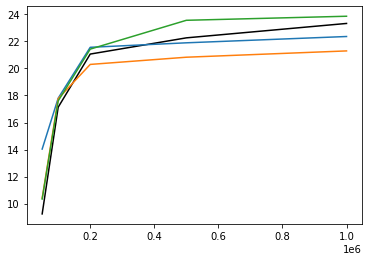

In [ ]:
for DA in ['Baseline','BT','SO','SC']:
    x,y = 0,0
    for lang in ['ita','tur','deu']:

      x2,y2 = getXYPoints(DA=DA,lang=lang)
      x = x + x2
      y = y + y2

    x = x / 3
    y = y / 3

    if DA == "Baseline":
      plt.plot(x,y,color="black")
    else:
      plt.plot(x,y)


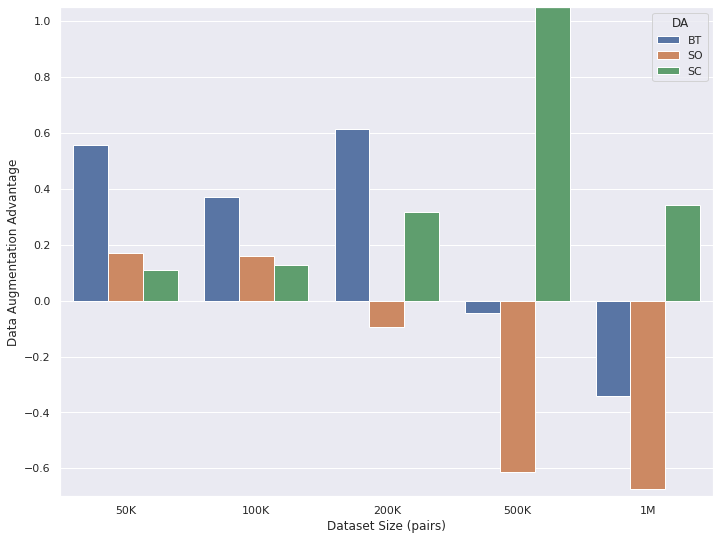

In [ ]:
sns.set(rc={'figure.figsize':(11.7,9)})
ax=sns.barplot(x=daa['size'],y=daa['DAA'],hue=daa['DA'], palette='deep')
plt.ylim(-.7, 1.05)

ax.set(xlabel='Dataset Size (pairs)', ylabel='Data Augmentation Advantage')
plt.show()

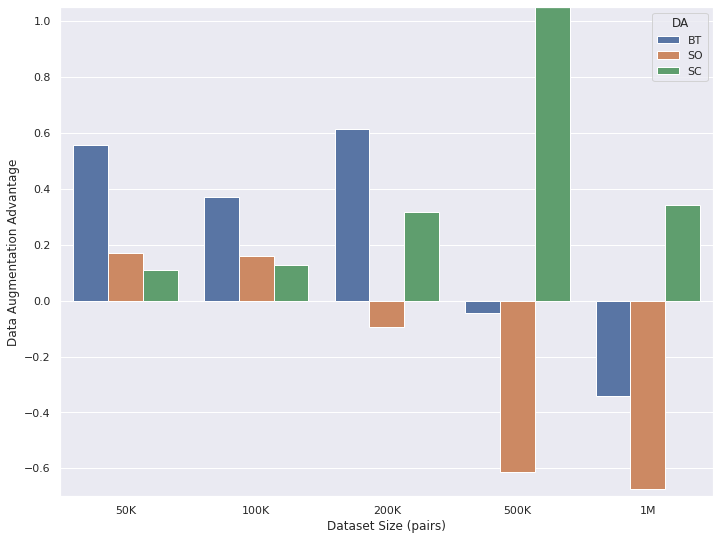

In [ ]:
sns.set(rc={'figure.figsize':(11.7,9)})
ax=sns.barplot(x=daa['size'],y=daa['DAA'],hue=daa['DA'], palette='deep')
plt.ylim(-.7, 1.05)

ax.set(xlabel='Dataset Size (pairs)', ylabel='Data Augmentation Advantage')
plt.show()

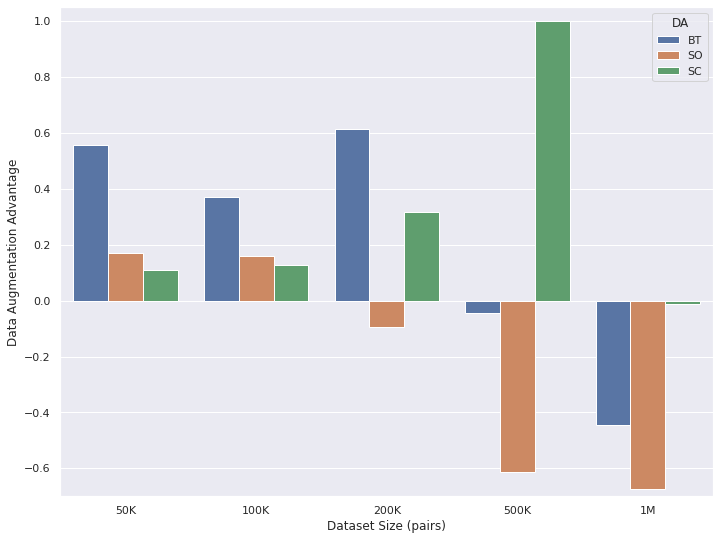

In [ ]:
sns.set(rc={'figure.figsize':(11.7,9)})
ax=sns.barplot(x=daa['size'],y=daa['DAA']-1,hue=daa['DA'], palette='deep')
plt.ylim(-.7, 1.05)

ax.set(xlabel='Dataset Size (pairs)', ylabel='Data Augmentation Advantage')
plt.show()

In [ ]:
import numpy as np

def kendall_w(expt_ratings):
    m = expt_ratings.shape[0]
    n = expt_ratings.shape[1]
    denom = m**2*(n**3-n)
    rating_sums = np.sum(expt_ratings, axis=0)
    S = n*np.var(rating_sums)
    return 12*S/denom

the_ratings = np.array(list([d[x] for x in d.keys() if "SC" in x]))


m = the_ratings.shape[0]
n = the_ratings.shape[1]

W = kendall_w(the_ratings)

count = 0
for trial in range(1000):
    perm_trial = []
    for _ in range(m):
        perm_trial.append(list(np.random.permutation(range(1, 1+n))))
    count += 1 if kendall_w(np.array(perm_trial)) > W else 0

print ('Calculated value of W:', W, ' exceeds permutation values in', count, 'out of 1000 cases')

Calculated value of W: 0.06528430224908015  exceeds permutation values in 972 out of 1000 cases


In [ ]:
bt_langs = []

In [ ]:
bt_langs = []
l = [d[x]  for x in d.keys() if "BT" in x]

for i in range(len(sizes)):
  bt_langs.append([c[i] for c in l])

<BarContainer object of 5 artists>

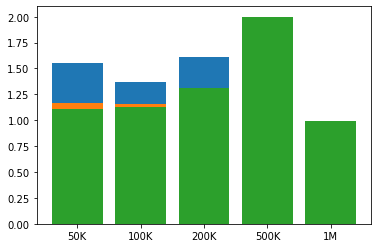

In [ ]:
plt.bar(sizes,p['BT'])
plt.bar(sizes,p['SO'])
plt.bar(sizes,p['SC'])


In [ ]:
p

{'BT': [0.5552178764388066,
  0.3689304732103646,
  0.6130536130536125,
  -0.04368686868686963,
  -0.34249999999999997],
 'SO': [0.16851289053323937,
  0.16080537819668286,
  -0.09384818080470266,
  -0.611807033546164,
  -0.6743659420289854],
 'SC': [0.10820964000469817,
  0.1274281274281276,
  0.31623931623931606,
  1.25,
  0.3437500000000007]}

In [ ]:
from scipy import interpolate


In [ ]:
for DA in ['BT','SO','SC']:

  for lang in ['tur','ita','deu']:

    print("\n\n",DA, lang)

    x1, y1 = getXYPoints(DA="Baseline",lang=lang)
    x2, y2 = getXYPoints(DA=DA,lang=lang)

    x1 = [0] + x1
    x2 = [0] + x2
    y1 = [0] + y1
    y2 = [0] + y2


    c = []
    for i,l in enumerate(list(zip(y2,sizes_num))):
      ypt,xpt = l[0], l[1]
      new_x = np.interp(ypt,y1,x1)
      f = interpolate.interp1d(np.array([0]+list(y1)), np.array([0]+list(x1)), fill_value='extrapolate')
      new_x = f(ypt)

      '''if len(new_x) > 0
      if ypt < y1[i]:
        new_x = new_x[0]
      if ypt > y1[i]:
        new_x = new_x[-1]
      else:
        new_x = new_x[0]'''


      c.append(((new_x-x1[i])/x1[i]))

      print(((new_x-x1[i])/x1[i]))
      print(x1[i])

    d[DA + " " + lang] = c



 BT tur
0.3720930232558137
50000
0.7391304347826086
100000
1.384615384615385
200000
0.8749999999999981
500000
0.31249999999999956
1000000


 BT ita
0.6875
50000
-0.1171875
100000
0.49999999999999795
200000
-0.4000000000000008
500000
-0.6000000000000002
1000000


 BT deu
0.6060606060606061
50000
0.4848484848484851
100000
-0.04545454545454559
200000
-0.6060606060606062
500000
-0.7399999999999992
1000000


 SO tur
0.1395348837209301
50000
0.13043478260869554
100000
-0.15217391304347838
200000
-0.6130434782608696
500000
-0.8043478260869565
1000000


 SO ita
0.078125
50000
0.23076923076923123
100000
-0.038461538461538436
200000
-0.6102564102564102
500000
-0.7499999999999999
1000000


 SO deu
0.287878787878788
50000
0.12121212121212185
100000
-0.09090909090909118
200000
-0.6121212121212121
500000
-0.46874999999999956
1000000


 SC tur
0.02325581395348825
50000
0.0
100000
0.11538461538461503
200000
1.2499999999999991
500000
0.6875000000000002
1000000


 SC ita
0.1953125
50000
0.230769230769

In [ ]:

for i,l in enumerate(list(zip(y2,sizes_num))):
  ypt,xpt = l[0], l[1]
  new_y = np.interp(xpt,x1,y1)

  print((y2[i]-new_y)/new_y)


0.29090909090909084
0.3469387755102039
0.08333333333333329
0.04458598726114645
0.030303030303030304
